# Get NVIDIA stock prices

In [21]:
from datetime import datetime, timedelta
import yfinance as yf 
import matplotlib.pyplot as plt 

import pandas as pd

In [27]:
start_date = datetime(2022, 1, 1) 
end_date = datetime(2024, 8, 16) 

In [24]:
before_data = yf.download('NVDA', start=datetime(2022, 1, 1), end=datetime(2024, 5, 15))

[*********************100%%**********************]  1 of 1 completed


In [25]:
during_data = yf.download('NVDA', start=datetime(2024, 5, 15), end=datetime(2024, 8, 16), interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [80]:
during_data['datetime'] = during_data.index
during_data['timestamp'] = (during_data['datetime'].tz_convert('UTC').astype('int64') // 1e6).astype('int')

In [86]:
during_data.to_csv("./data/nvidia_stock_during.csv", index=False)

In [70]:
data = pd.concat([before_data, during_data])

In [73]:
data['datetime'] = data.index

In [58]:
data['datetime'] = data.index
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce', utc=True)
data['datetime'] = data['datetime'].dt.tz_localize(None)


In [60]:
data.to_csv("./data/nvidia_stock.csv", index=False)

In [40]:
test_data = pd.read_csv("./data/nvidia_stock.csv", index_col="timestamp")

# Full Overview plot

In [157]:
complete_data = yf.download('NVDA', start=datetime(2022, 1, 1), end=datetime(2024, 8, 16))

[*********************100%%**********************]  1 of 1 completed


In [189]:
sp_complete_data = yf.download('^GSPC', start=datetime(2022, 1, 1), end=datetime(2024, 8, 16))

[*********************100%%**********************]  1 of 1 completed


In [159]:
start_date = min(complete_data.index).date()
end_date = max(complete_data.index).date()

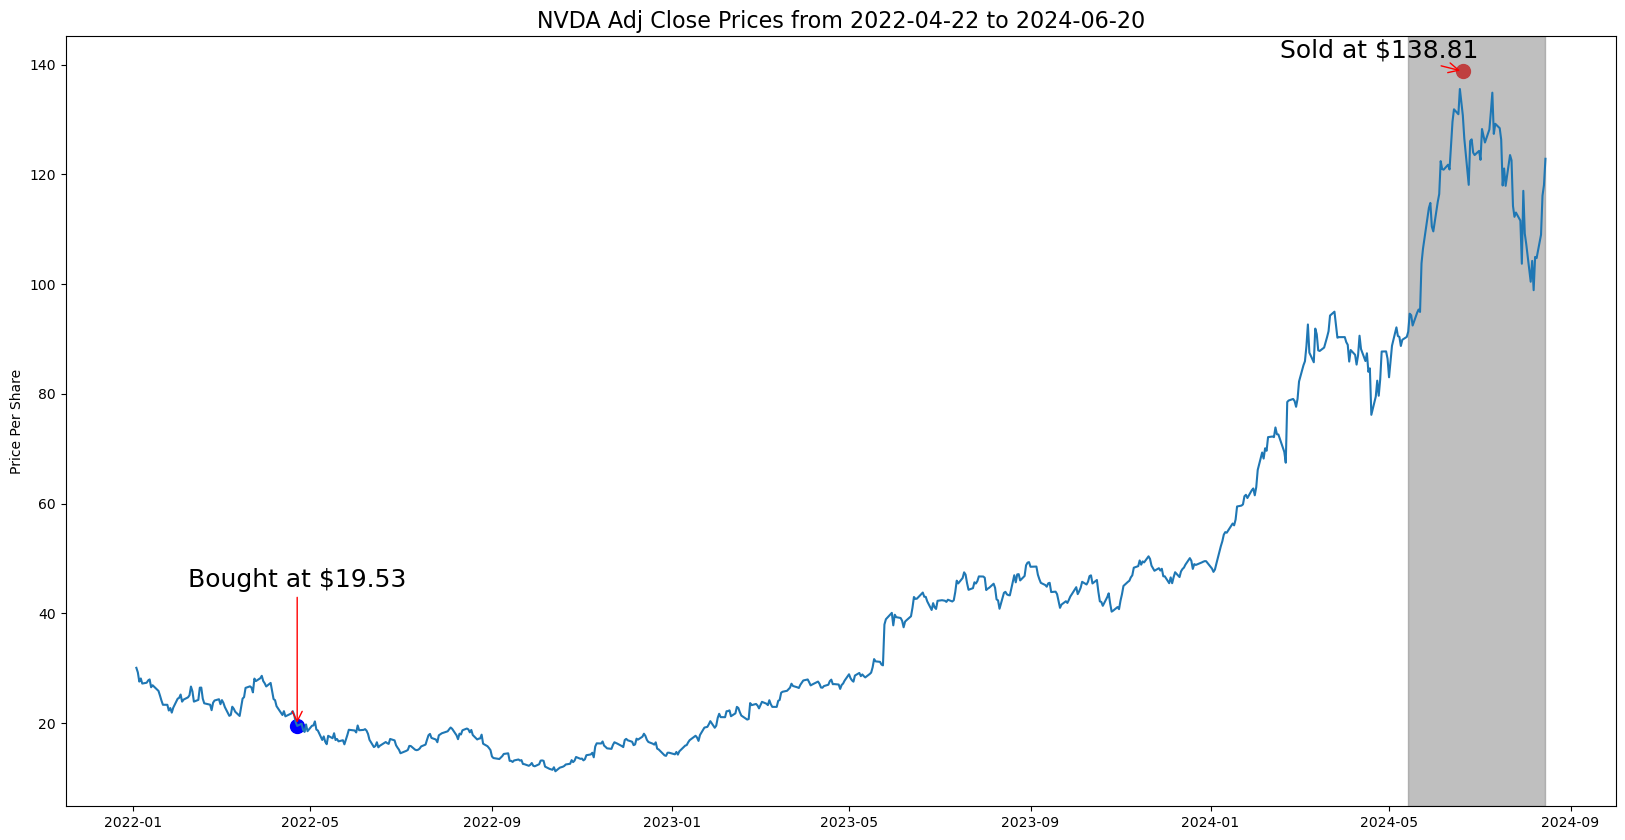

In [201]:
plt.figure(figsize = (20,10)) 
plt.title('NVDA Adj Close Prices from {} to {}'.format(start_date, 
                                                end_date), fontsize=16) 
plt.plot(complete_data['Adj Close']) 
buy_date, buy_price = (datetime(2022, 4, 22), 19.53)
if buy_date in complete_data.index:
    opening_price_on_date = complete_data.loc[buy_date, 'Adj Close']
    plt.scatter(buy_date, opening_price_on_date, color='blue', label='Buy', s=100)  # mark the date with a red dot
    plt.annotate(f'Bought at ${buy_price}', (buy_date, buy_price), textcoords="offset points", xytext=(0,100), ha='center', fontsize=18,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

sell_date, sell_price = (datetime(2024, 6, 20), 138.81)
if sell_date in complete_data.index:
    opening_price_on_date = complete_data.loc[sell_date, 'Adj Close']
    plt.scatter(sell_date, sell_price, color='red', label='Sell', s=100)  # mark the date with a red dot
    plt.annotate(f'Sold at ${138.81}', (sell_date, sell_price), textcoords="offset points", xytext=(-60,10), ha='center', fontsize=18,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))
    
tint_start = datetime(2024, 5, 14)
plt.axvspan(tint_start, complete_data.index[-1], color='gray', alpha=0.5)
    
plt.ylabel("Price Per Share")
plt.show()

In [ ]:
# datetime(2022, 4, 22) # buy for 19.53 (after split)
# datetime(2024, 5, 8) # sell for 89.92 (after split)
# datetime(2024, 6, 20) # sell for 138.81


In [116]:
138.81 / 19.53

7.10752688172043

In [120]:
max(test_data['High'])

140.75999450683594

# Create plots for Demo

In [112]:
full_data = yf.download('NVDA', start=datetime(2022, 4, 22), end=datetime(2024, 6, 21))

[*********************100%%**********************]  1 of 1 completed


In [191]:
sp_full_data = yf.download('^GSPC', start=datetime(2022, 4, 22), end=datetime(2024, 6, 21))

[*********************100%%**********************]  1 of 1 completed


In [192]:
sell_price = 138.81
buy_price = 19.53
full_data['pct_return'] = (full_data['Adj Close'] / buy_price)*100
sp_start_value = sp_full_data.iloc[0]['Adj Close']
sp_full_data['pct_return'] = (sp_full_data['Adj Close'] / sp_start_value)*100

In [153]:
pct_return = (sell_price / buy_price)*100
full_data.at[full_data.index[-1], 'pct_return'] = pct_return
full_data.at[full_data.index[-1], 'Adj Close'] = sell_price

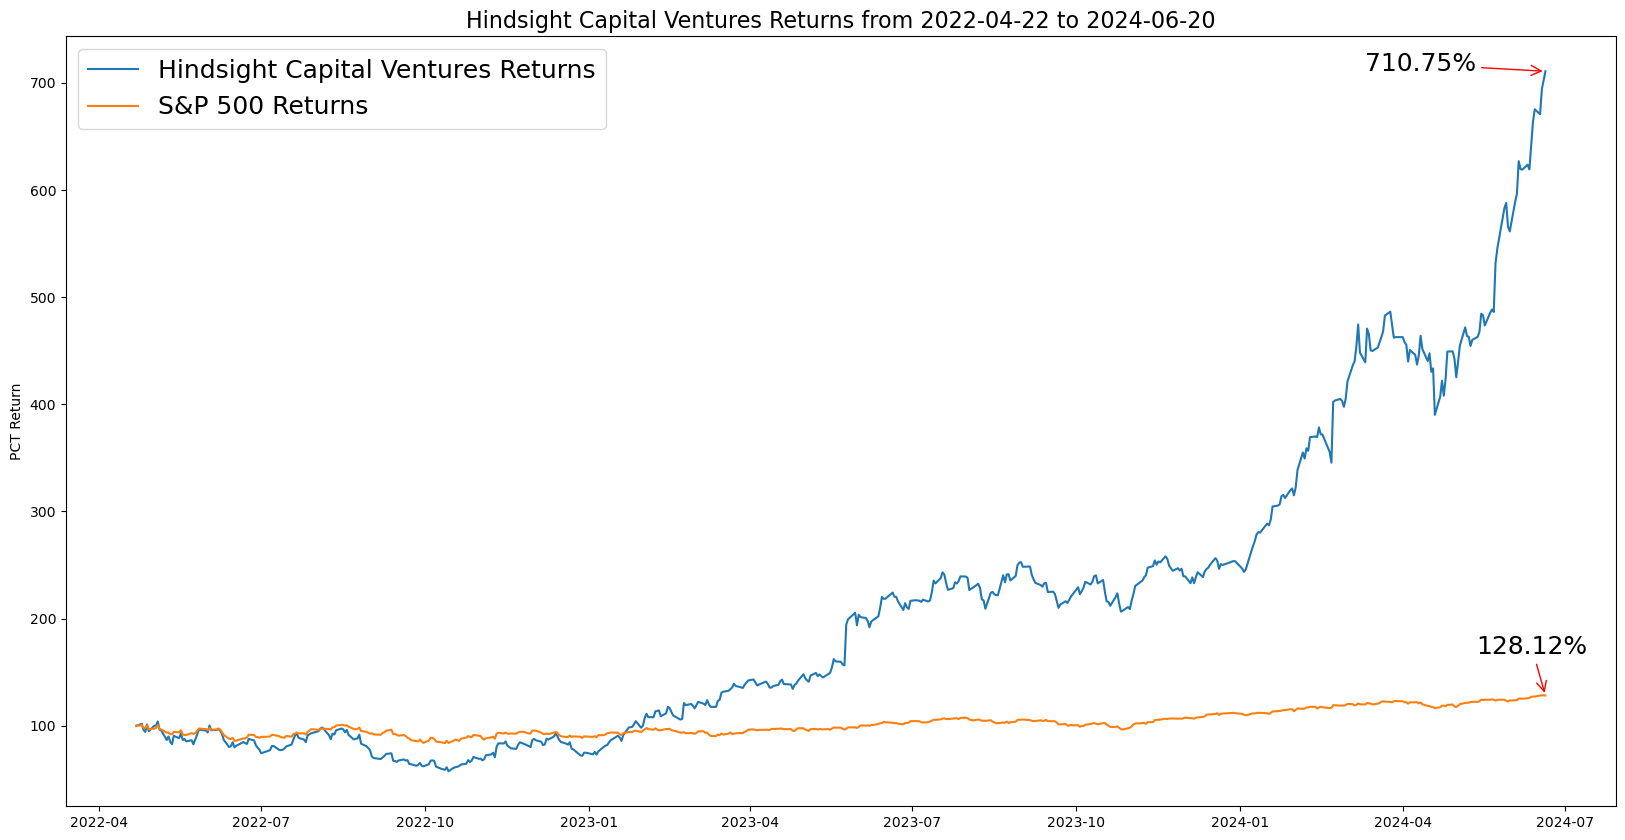

In [200]:
plt.figure(figsize = (20,10)) 
start_date = min(full_data.index).date()
end_date = max(full_data.index).date()
plt.title('Hindsight Capital Ventures Returns from {} to {}'.format(start_date, 
                                                end_date), fontsize=16) 
plt.plot(full_data['pct_return'], label='Hindsight Capital Ventures Returns') 
plt.plot(sp_full_data['pct_return'], label='S&P 500 Returns')
# buy_date, buy_price = (datetime(2022, 4, 22), 19.53)
# if buy_date in data.index:
#     opening_price_on_date = data.loc[buy_date, 'Open']
#     plt.scatter(buy_date, opening_price_on_date, color='blue', label='Buy', s=100)  # mark the date with a red dot
#     # plt.annotate(f'{round(opening_price_on_date, 2)}', (buy_date, opening_price_on_date), textcoords="offset points", xytext=(0,10), ha='center')

# sell_dates = [(datetime(2024, 5, 8), 89.92), (datetime(2024, 6, 20), 138.81)]
# for sell_date, sell_price in sell_dates:
#     if sell_date in data.index:
#         opening_price_on_date = data.loc[sell_date, 'Open']
#         plt.scatter(sell_date, opening_price_on_date, color='red', label='Sell', s=100)  # mark the date with a red dot
#         # plt.annotate(f'{round(opening_price_on_date, 2)}', (sell_date, opening_price_on_date), textcoords="offset points", xytext=(0,10), ha='center')
last_point = full_data.iloc[-1]

plt.annotate(f'{round(pct_return, 2)}%', (max(full_data.index), last_point['pct_return']), textcoords="offset points", xytext=(-90,0), fontsize=18,
             ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

sp_pct_return = sp_full_data.iloc[-1]['pct_return']
plt.annotate(f'{round(sp_pct_return, 2)}%', (max(sp_full_data.index), sp_pct_return), textcoords="offset points", xytext=(-10,30), fontsize=18,
             ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

plt.ylabel("PCT Return")
plt.legend(loc='upper left', fontsize=18)
plt.show()

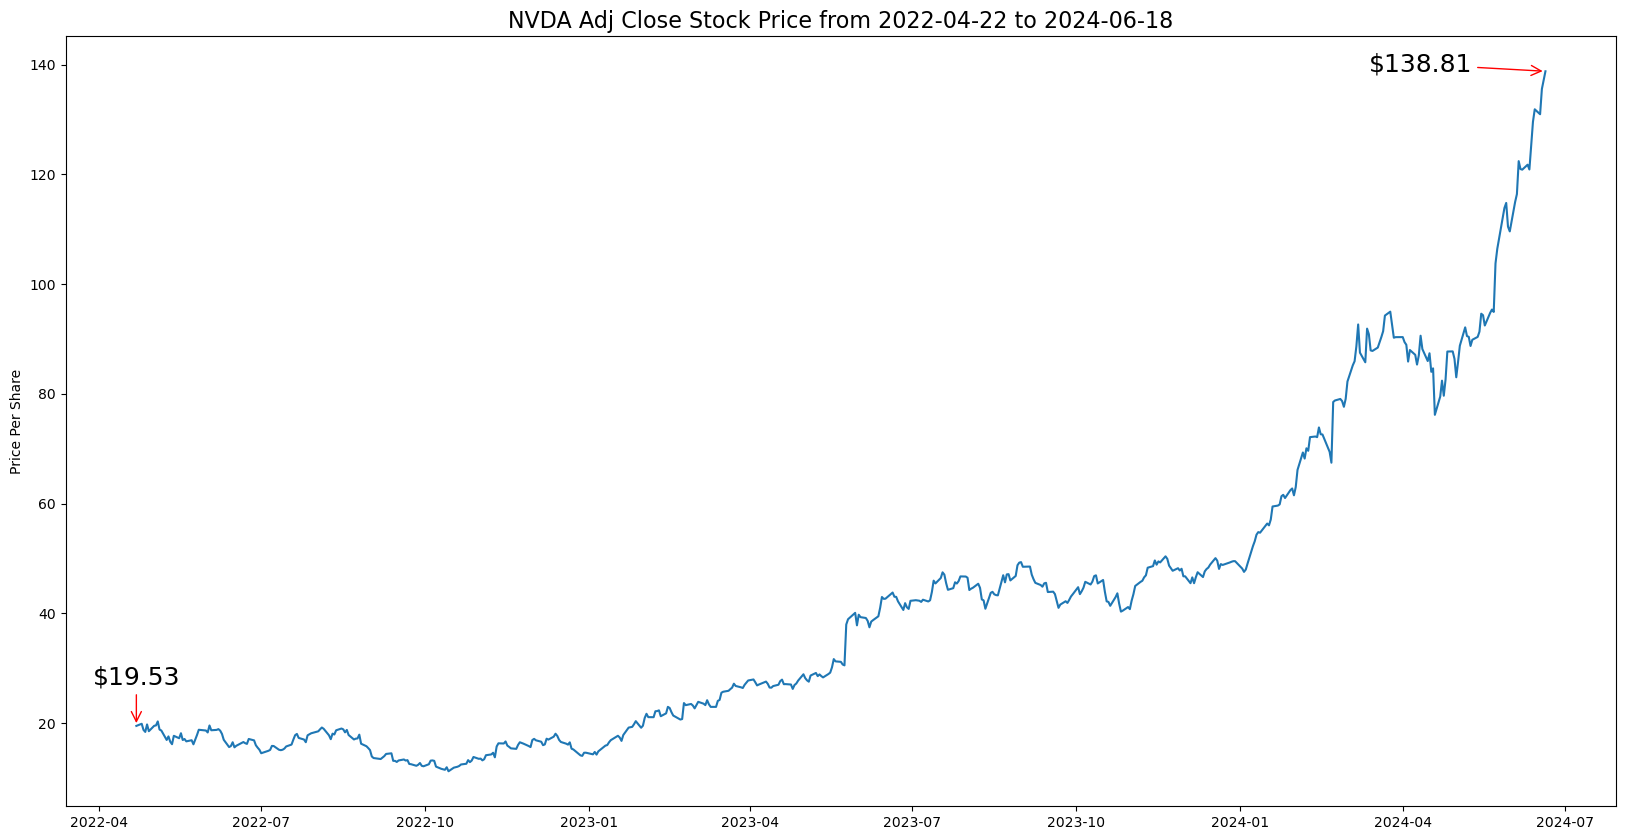

In [158]:
plt.figure(figsize = (20,10)) 
plt.title('NVDA Adj Close Stock Price from {} to {}'.format(start_date, 
                                                end_date), fontsize=16) 
plt.plot(full_data['Adj Close']) 
# buy_date, buy_price = (datetime(2022, 4, 22), 19.53)
# if buy_date in data.index:
#     opening_price_on_date = data.loc[buy_date, 'Open']
#     plt.scatter(buy_date, opening_price_on_date, color='blue', label='Buy', s=100)  # mark the date with a red dot
#     # plt.annotate(f'{round(opening_price_on_date, 2)}', (buy_date, opening_price_on_date), textcoords="offset points", xytext=(0,10), ha='center')

# sell_dates = [(datetime(2024, 5, 8), 89.92), (datetime(2024, 6, 20), 138.81)]
# for sell_date, sell_price in sell_dates:
#     if sell_date in data.index:
#         opening_price_on_date = data.loc[sell_date, 'Open']
#         plt.scatter(sell_date, opening_price_on_date, color='red', label='Sell', s=100)  # mark the date with a red dot
#         # plt.annotate(f'{round(opening_price_on_date, 2)}', (sell_date, opening_price_on_date), textcoords="offset points", xytext=(0,10), ha='center')
first_point = full_data.iloc[0]
plt.annotate(f'${buy_price}', (min(full_data.index), first_point['Adj Close']), textcoords="offset points", xytext=(0,30), fontsize=18,
             ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

last_point = full_data.iloc[-1]
plt.annotate(f'${138.81}', (max(full_data.index), last_point['Adj Close']), textcoords="offset points", xytext=(-90,0), fontsize=18,
             ha='center', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

plt.ylabel("Price Per Share")
plt.show()

In [ ]:
data = yf.download('NVDA', start=datetime(2022, 4, 22), end=datetime(2024, 6, 21))